In [1]:
pip install torchinfo


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchinfo

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


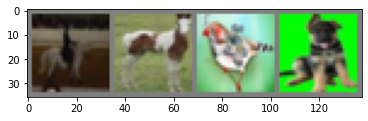

horse horse bird  dog  


In [4]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [5]:
from torch.nn.modules import BatchNorm2d
import torch.nn as nn
import torch.nn.functional as F

# class Block(nn.Module):
#   def __init__(self,kernel_size,inC,outC,groups):
#     super().__init__()

    

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        # self.conv1 = nn.Conv2d(3, 6, 5)
        # self.pool = nn.MaxPool2d(2, 2)
        # self.conv2 = nn.Conv2d(6, 16, 5)
        # self.fc1 = nn.Linear(16 * 5 * 5, 120)
        # self.fc2 = nn.Linear(120, 84)
        # self.fc3 = nn.Linear(84, 10)
        #===============
        self.conv1 = nn.Sequential(
            nn.Conv2d(3,32,kernel_size=3,stride=2,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        ) 
        self.conv1_dw = nn.Sequential(
            nn.Conv2d(32,32,kernel_size=3,groups=32,padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.Conv2d(32,32,kernel_size=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(32,64,kernel_size=3,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        ) 
        self.conv2_dw = nn.Sequential(
            nn.Conv2d(64,64,kernel_size=3,stride=2,groups=64,padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.Conv2d(64,64,kernel_size=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(64,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        ) 
        self.conv3_dw = nn.Sequential(
            nn.Conv2d(128,128,kernel_size=3,groups=128,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.Conv2d(128,128,kernel_size=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(128,128,kernel_size=3,padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU()
        ) 
        self.avg_pool = nn.Sequential(
            nn.AdaptiveAvgPool2d(1)
        )

        self.fc1 = nn.Sequential(
            # nn.MaxPool2d(4),
            nn.Flatten(),
            # nn.Dropout(0.1),
            nn.Linear(128,10)

        )


      

    def forward(self, x):
      x = self.conv1(x)
      x = self.conv1_dw(x)
      x = self.conv2(x)
      x = self.conv2_dw(x)
      x = self.conv3(x)
      x = self.conv3_dw(x)
      x = self.conv4(x)
      x = self.avg_pool(x)
      # x = torch.flatten(x)
      x = self.fc1(x)

      
        # x = self.pool(F.relu(self.conv1(x)))
        # x = self.pool(F.relu(self.conv2(x)))
        # x = torch.flatten(x, 1) # flatten all dimensions except batch
        # x = F.relu(self.fc1(x))
        # x = F.relu(self.fc2(x))
        # x = self.fc3(x)
      return x


net = Net()
inf = torchinfo.summary(net,(4,3,32,32),col_names=["input_size", "output_size", "num_params", "kernel_size"],row_settings=["var_names"])
inf

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Kernel Shape
Net (Net)                                [4, 3, 32, 32]            [4, 10]                   --                        --
├─Sequential (conv1)                     [4, 3, 32, 32]            [4, 32, 16, 16]           --                        --
│    └─Conv2d (0)                        [4, 3, 32, 32]            [4, 32, 16, 16]           896                       [3, 3]
│    └─BatchNorm2d (1)                   [4, 32, 16, 16]           [4, 32, 16, 16]           64                        --
│    └─ReLU (2)                          [4, 32, 16, 16]           [4, 32, 16, 16]           --                        --
├─Sequential (conv1_dw)                  [4, 32, 16, 16]           [4, 32, 16, 16]           --                        --
│    └─Conv2d (0)                        [4, 32, 16, 16]           [4, 32, 16, 16]           320                       [3, 3]
│    └

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.03, momentum=0.9)

In [7]:
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.067
[1,  4000] loss: 1.838
[1,  6000] loss: 1.684
[1,  8000] loss: 1.566
[1, 10000] loss: 1.494
[1, 12000] loss: 1.406
[2,  2000] loss: 1.311
[2,  4000] loss: 1.232
[2,  6000] loss: 1.211
[2,  8000] loss: 1.146
[2, 10000] loss: 1.076
[2, 12000] loss: 1.085
[3,  2000] loss: 0.972
[3,  4000] loss: 0.984
[3,  6000] loss: 0.948
[3,  8000] loss: 0.947
[3, 10000] loss: 0.907
[3, 12000] loss: 0.913
[4,  2000] loss: 0.802
[4,  4000] loss: 0.833
[4,  6000] loss: 0.824
[4,  8000] loss: 0.823
[4, 10000] loss: 0.819
[4, 12000] loss: 0.801
[5,  2000] loss: 0.727
[5,  4000] loss: 0.739
[5,  6000] loss: 0.745
[5,  8000] loss: 0.718
[5, 10000] loss: 0.729
[5, 12000] loss: 0.731
[6,  2000] loss: 0.665
[6,  4000] loss: 0.650
[6,  6000] loss: 0.663
[6,  8000] loss: 0.670
[6, 10000] loss: 0.658
[6, 12000] loss: 0.648
[7,  2000] loss: 0.579
[7,  4000] loss: 0.594
[7,  6000] loss: 0.603
[7,  8000] loss: 0.623
[7, 10000] loss: 0.622
[7, 12000] loss: 0.609
[8,  2000] loss: 0.526
[8,  4000] 

In [8]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

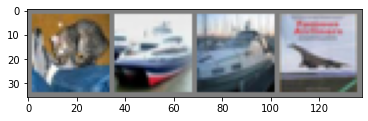

GroundTruth:  cat   ship  ship  plane


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [11]:
outputs = net(images)

In [12]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))


Predicted:  cat   ship  plane plane


In [13]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 79 %


In [14]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 87.3 %
Accuracy for class: car   is 87.9 %
Accuracy for class: bird  is 70.7 %
Accuracy for class: cat   is 56.1 %
Accuracy for class: deer  is 83.7 %
Accuracy for class: dog   is 64.8 %
Accuracy for class: frog  is 88.2 %
Accuracy for class: horse is 83.6 %
Accuracy for class: ship  is 84.5 %
Accuracy for class: truck is 83.4 %
